## Ch1 声音和信号
### 1.3 信号  
例化cosine和sine信号

In [1]:
import sys
sys.path.append("../Lib_src")

from thinkdsp import CosSignal, SinSignal # function

cos_sig = CosSignal(freq=440,amp=1.0,offset=0)
sin_sig = SinSignal(freq=880,amp=0.5,offset=0)

绘制正弦和余弦信号

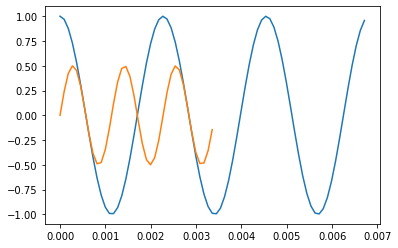

In [2]:
from thinkdsp import decorate

cos_sig.plot()
sin_sig.plot()

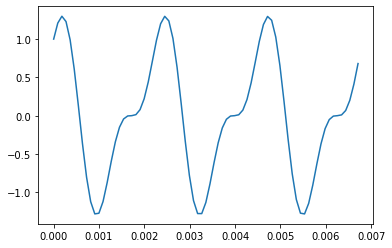

In [3]:
sum_signal = cos_sig + sin_sig
sum_signal.plot()

### 1.4 波形的读写


duration=0.5 持续0.5s
framerate=11025 每秒采样11025次

In [4]:
import thinkdsp
wave = sum_signal.make_wave(duration=0.5, start=0, framerate=11025)

播放音频

In [5]:
#from IPython.display import Audio
#audio = Audio(data=wave.ys, rate=wave.framerate)
#audio  
wave.make_audio()

wave的ys属性是一个numpy数组 包含所有信号的值  
采样间距是wave.framerate的倒数

In [6]:
print('Number of samples', len(wave.ys))
print('Timestep in ms', 1 / wave.framerate * 1000)

Number of samples 5512
Timestep in ms 0.09070294784580499


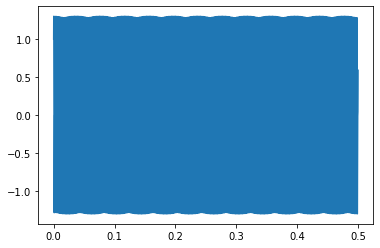

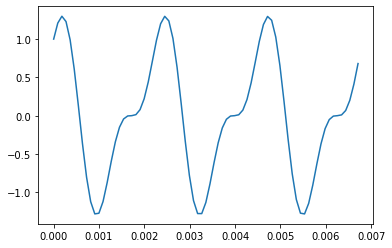

In [7]:
import matplotlib.pyplot as plt
wave_segment=wave.segment(start=0, duration=sum_signal.period*3)

plt.figure(1)
wave.plot()

plt.figure(2)
wave_segment.plot()

In [8]:
wave.write('temp.wav')

Writing temp.wav


g:\Github\Python_ThinkDSP_study\My_Code\Ch1\../Lib_src\thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


使用外部播放器播放wav文件

In [9]:
wave.make_audio()

### 1.5 频谱

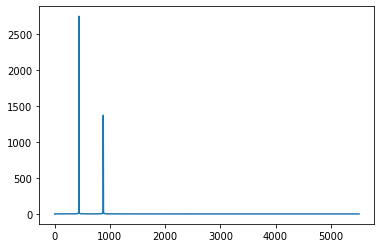

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot()

wave是两个信号组成 440 以及 880Hz
cos_sig = CosSignal(freq=440,amp=1.0,offset=0)
sin_sig = SinSignal(freq=880,amp=0.5,offset=0)

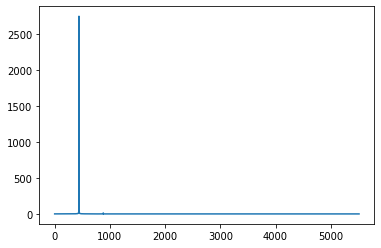

In [11]:
spectrum.low_pass(cutoff=600, factor=0.01)
spectrum.plot()

### 1.6 波形对象  
thinkdsp初始库包括：  
* signal（只读属性 ：period）
> 是一个基类 只用来为其它函数提供服务的  提供make_wave 子类继承这些方法并提供evaluate 也就是在给定的时间序列内对信号进行取值  
* wave（1. 信号参数：ys 2. 信号开始采样和取值的时间点数组ts 3.每单位时间采样数framerate  只读属性：start，end，duration）
* spectrum 


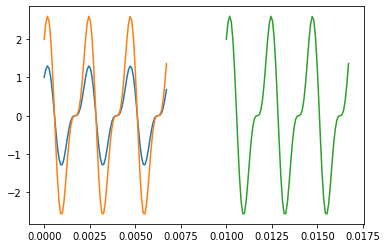

In [12]:
wave_segment.plot()
wave_segment.scale(2)
wave_segment.plot()
wave_segment.shift(0.01)
wave_segment.plot()

### 1.7 信号对象

0.001


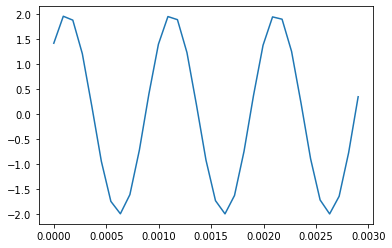

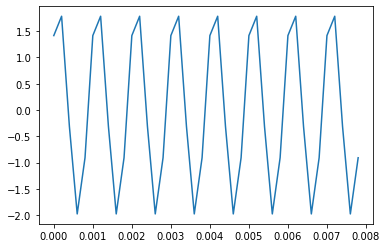

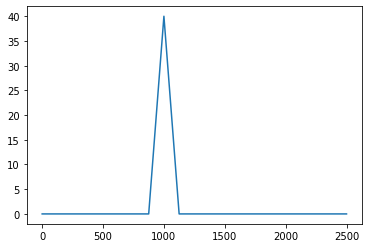

In [13]:
import numpy as np
my_signal = thinkdsp.Sinusoid(freq=1000, amp=2.0,offset=np.pi/4,func=np.sin)
plt.figure(1)
print (my_signal.period)
my_signal.plot()

plt.figure(2)
my_wave=my_signal.make_wave(duration= my_signal.period*8, start=0,framerate=5000)
my_wave.plot()

plt.figure(3)
my_spectrum = my_wave.make_spectrum()
my_spectrum.plot()


### 练习1-2    

采用音频：170255__dublie__trumpet

In [14]:
trumpet = thinkdsp.read_wave('170255__dublie__trumpet.wav')
print(trumpet.framerate)
trumpet.make_audio()


44100


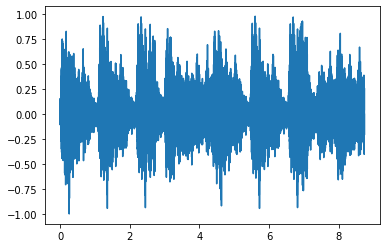

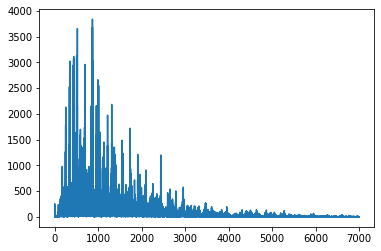

In [15]:
plt.figure(1)
trumpet.plot()

plt.figure(2)
trumpet_spectrum = trumpet.make_spectrum()
trumpet_spectrum.plot(high=7000)

In [16]:
trumpet_spectrum.peaks()[0:30]

[(3839.421028027221, 868.664296861003),
 (3676.3664349424603, 867.7482258914686),
 (3657.7777814942247, 522.2749615058046),
 (3135.6405200257514, 505.78568405418537),
 (3116.1504016869303, 437.9964323086391),
 (3065.9677882071865, 436.16429036957027),
 (3043.5640348609672, 870.4964388000718),
 (3025.5559434856427, 348.22147729426706),
 (2960.878380517086, 699.1911674971374),
 (2941.679123928689, 417.8428709788821),
 (2865.2812007103903, 698.275096527603),
 (2723.8614611947064, 346.3893353551982),
 (2705.101621653529, 868.4352791186193),
 (2663.3404369518084, 992.5628954905317),
 (2607.467516646909, 416.0107290398133),
 (2597.5655584289216, 867.9772436338521),
 (2548.60524371837, 1011.5713681083707),
 (2529.4264573824557, 868.8933146033866),
 (2529.1242579268423, 339.06076759892295),
 (2511.6350403625675, 869.5803678305374),
 (2421.0520475001513, 993.0209309752989),
 (2408.046666531745, 867.5192081490849),
 (2389.53557362037, 505.90019292537716),
 (2386.909488323958, 868.5497879898112),

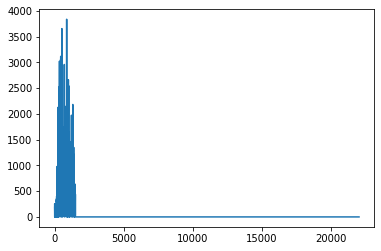

In [17]:
trumpet_spectrum.copy()
trumpet_spectrum.low_pass(1500)
trumpet_spectrum.plot()

In [18]:
new_trumpet_wave = trumpet_spectrum.make_wave()
new_trumpet_wave.write(filename='new_trumpet.wav')
new_trumpet_wave.make_audio()

Writing new_trumpet.wav


### 练习1-3

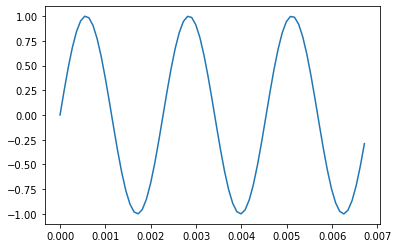

In [19]:
my_sin = SinSignal()
my_sin.plot()

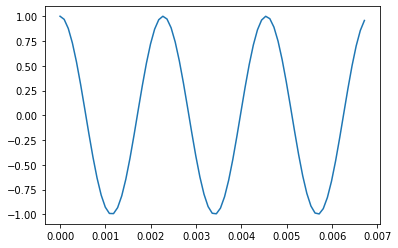

In [20]:
my_cos = CosSignal()
my_cos.plot()

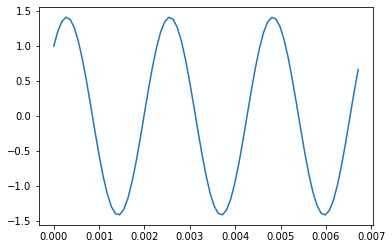

In [21]:
sum_signal = my_cos + my_sin
sum_signal.plot()

In [22]:
sum_wave = sum_signal.make_wave()
sum_wave.scale(5)
sum_wave.write(filename='sum_wave.wav')
sum_wave.make_audio()

Writing sum_wave.wav


g:\Github\Python_ThinkDSP_study\My_Code\Ch1\../Lib_src\thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


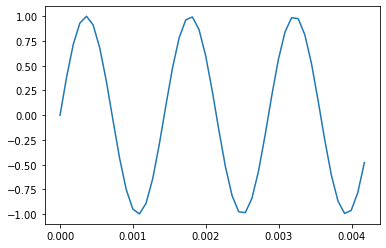

In [23]:
misc_signal = SinSignal(freq=700)
misc_signal.plot()
misc_wave = misc_signal.make_wave()
sum_wave += misc_wave

In [24]:
sum_wave.make_audio()


Writing new_sum_wave.wav


g:\Github\Python_ThinkDSP_study\My_Code\Ch1\../Lib_src\thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


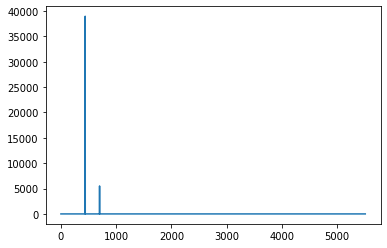

In [25]:
sum_wave.make_spectrum().plot()
sum_wave.write(filename='new_sum_wave.wav')

### 练习1-4

In [26]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

快进两倍

In [27]:
wave1 =  thinkdsp.read_wave('170255__dublie__trumpet.wav')
stretch(wave1, 0.5)
wave1.make_audio()

In [28]:
wave1.write(filename='2speed_170255__dublie__trumpet.wav')

Writing 2speed_170255__dublie__trumpet.wav
